In [1]:
from threeML import *

import matplotlib.pyplot as plt

%matplotlib inline


WARNING UserWarning: /home/user/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


WARNING NaimaNotAvailable: The naima package is not available. Models that depend on it will not be available



Configuration read from /home/user/.threeML/threeML_config.yml
Plotter is MatPlotlib



WARNING CannotImportPlugin: Could not import plugin /usr/local/lib/python2.7/dist-packages/threeML-0.2.0-py2.7.egg/threeML/plugins/SherpaLike.py. Do you have the relative instrument software installed and configured?



In [2]:
triggerName = 'bn090217206'
ra = 204.9
dec = -8.4

#Data are in the current directory

datadir = os.path.abspath('.')

#Create an instance of the GBM plugin for each detector
#Data files
obsSpectrum = os.path.join( datadir, "bn090217206_n6_srcspectra.pha{1}" )
bakSpectrum = os.path.join( datadir, "bn090217206_n6_bkgspectra.bak{1}" )
rspFile     = os.path.join( datadir, "bn090217206_n6_weightedrsp.rsp{1}" )

#Plugin instance
NaI6 = FermiGBMLike( "NaI6", obsSpectrum, bakSpectrum, rspFile )

#Choose energies to use (in this case, I exclude the energy
#range from 30 to 40 keV to avoid the k-edge, as well as anything above
#950 keV, where the calibration is uncertain)
NaI6.setActiveMeasurements( "10.0-30.0", "40.0-950.0" )


Now using 117 channels out of 128


In [3]:
#This declares which data we want to use. In our case, all that we have already created.

data_list = DataList( NaI6 )

In [4]:
powerlaw = powerlaw()

In [5]:
GRB = PointSource( triggerName, ra, dec, spectral_shape=powerlaw )

In [6]:
model = Model( GRB )

In [7]:
jl = JointLikelihood( model, data_list )

res = jl.fit()

Best fit values:



Name,Value,Unit
bn090217206.spectrum.main.powerlaw.K,2.45 +/- 0.25,1 / (cm2 keV s)
bn090217206.spectrum.main.powerlaw.index,-1.176 +/- 0.019,



NOTE: errors on parameters are approximate. Use get_errors().

Nuisance parameters:



Name,Value,Unit
InterCalib_of_NaI6,1.0,



Correlation matrix:



1.00,-0.99
-0.99,1.00



Minimum of -logLikelihood is: 575.567759251

Contributions to the -logLikelihood at the minimum:



Detector,-LogL
NaI6,575.57


In [8]:
res = jl.get_errors()

Name,Value,Unit
bn090217206.spectrum.main.powerlaw.K,2.45 -0.13 +0.20,1 / (cm2 keV s)
bn090217206.spectrum.main.powerlaw.index,-1.176 -0.015 +0.010,


 [*********************100%***********************]  20 of 20 completed in 0.2 s

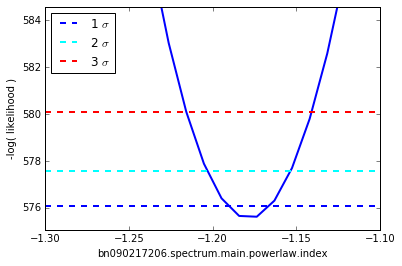

In [10]:
res = jl.get_contours(powerlaw.index,-1.3,-1.1,20)

 [*********************100%***********************]  2500 of 2500 completed in 3.0 s

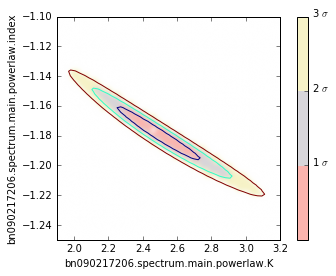

In [15]:
res = jl.get_contours(powerlaw.index,-1.25,-1.1,50,powerlaw.K,1.9,3.2,50)

In [16]:
bayes = BayesianAnalysis(model, data_list)

In [17]:
powerlaw.index.prior = uniform_prior(lower_bound=-5.0, upper_bound=5.0)
powerlaw.K.prior = log_uniform_prior(lower_bound=1.0, upper_bound=10)

In [18]:
samples = bayes.sample(n_walkers=20,burn_in=100, n_samples=1000)

Running burn-in of 100 samples...

 [*********************100%***********************]  100 of 100 completed in 1.6 s

Sampling...

 [*********************100%***********************]  1000 of 1000 completed in 14.7 s
Mean acceptance fraction: 0.7198


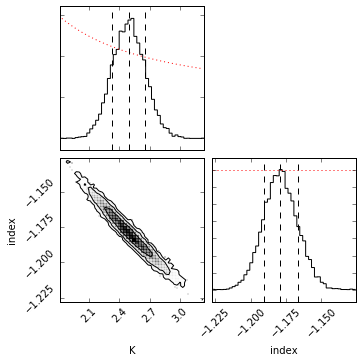

In [20]:
fig = bayes.corner_plot()